In [11]:
import sklearn  # Import  de Bibliotecas 

#  pip install -U scikit-learn #  Se necessario esse é o comando para instalar a biblioteca atualizada 

import pandas as pd   

import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings("ignore") #Controle de Aviso .


In [12]:
print(sklearn.__version__)  #Verificar versão 


0.24.2


In [13]:
# IMPORTAR DATASER DO COLAB
iris_df = pd.read_csv("/content/iris.csv",index_col=0)  #'index_col=0'  Para eliminar a coluna zero


,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,0,5.1,3.5,1.4,0.2,0,setosa
1,1,4.9,3.0,1.4,0.2,0,setosa
2,2,4.7,3.2,1.3,0.2,0,setosa
3,3,4.6,3.1,1.5,0.2,0,setosa
4,4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
#iris_df = pd.read_csv("iris.csv") # A função Pandas read_csv() Lê todo o ficheiro de valores separados por vírgulas 


In [10]:
from IPython.display import Image  #Mostrar Imagem do Dataset
Image (filename='/content/iris.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris.png'

In [ ]:
#IMPORTA BIBLIOTECAS PARA PLOTAR GRAFICOS 

import plotly.express as px  

# coder#

fig =  px.scatter_3d(iris_df, x=  'sepal length (cm)', y = 'sepal width (cm)', z= 'petal width (cm)',color = 'target_name')

fig.show() 

In [ ]:
# Criando Modelo 

#importar biblioteca Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  train_test_split


In [ ]:
#Separar quais variaveis de entra e variaveis de Saida para alimentar nosso modelo.

X = iris_df.drop(columns=["target_name", "target"])
Y = iris_df[["target"]]



In [ ]:
#Modelo de ( test_size=0.3) = trabalhando com   30% dos dados .
#Modelo de Treinamento trabalhando com apenas 70% dos dados random_state=7)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [ ]:
#Sempre que fazer split é importante confirmar os shape dos modelos de Train e test.
X_train.shape
X_test.shape

y_train.shape
y_test.shape

#Fiz o print apenas para output das respostas .
print(X_train.shape,
X_test.shape
)
print(y_train.shape,
y_test.shape)



(105, 4) (45, 4)
(105, 1) (45, 1)


In [ ]:
#Criando Algoritimo KNN .   

# Criando Variavel para saber qual quantidade de Vizinhos serão escolhidos. =3

K_neighbors = 3

# Criando Classificador  clf - Recebendo parametros (n_neighbors=K_neighbors)

clf = KNeighborsClassifier(n_neighbors=K_neighbors)

#Fim do Modelo ......Agora vamos treinar o Modelo..

In [ ]:
# Agora vamos trainar o modelo . 

#Enviando comando para o algoritimo aprender as respostas .

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Verificar e mostrar Predição de Y 
y_pred = clf.predict(X_test)

In [ ]:
 #Mostrar Dados .. 
y_pred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1])

In [ ]:
#Metricar de Acuracia para ver o desempenho do modelo .

#Biblioteca para verificar acuracia . 
from sklearn.metrics import accuracy_score

# Algoritimo de acuracia. 

accuracy_score(y_test, y_pred)*100

93.33333333333333

In [ ]:
#Vamos Criar uma estrutura para verificar qual melhor numero para o modelo KNN...

#Usando um Loop de 3 a 15.
scores_list = []
K_neighbors = range(3, 15)


In [ ]:
for k in K_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Acuracia')

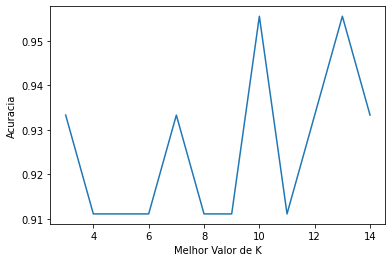

In [ ]:
#Biblioteca para plotar grafico .

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(K_neighbors, scores_list)
plt.xlabel("Melhor Valor de K")
plt.ylabel("Acuracia")

**O nosso modelo de Treinamento mostrou que  o melhor K (KNN)  foi o numero 10  com mais de 95%** Como estamos vendo no Grafico  